In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [3]:
df_cust = pd.read_csv('Mall_Customers.csv')

In [4]:
df_cust.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
149,150,Male,34,78,90
131,132,Male,39,71,75
164,165,Male,50,85,26
124,125,Female,23,70,29
88,89,Female,34,58,60


In [5]:
df_cust.shape

(200, 5)

In [8]:
from sklearn.cluster import KMeans

In [9]:
df_cust.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
select_cols = ['Age','Spending Score (1-100)']

In [12]:
df_cust[select_cols]

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


### Let us plot a scatter plot

In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [18]:
plt.style.use('ggplot')

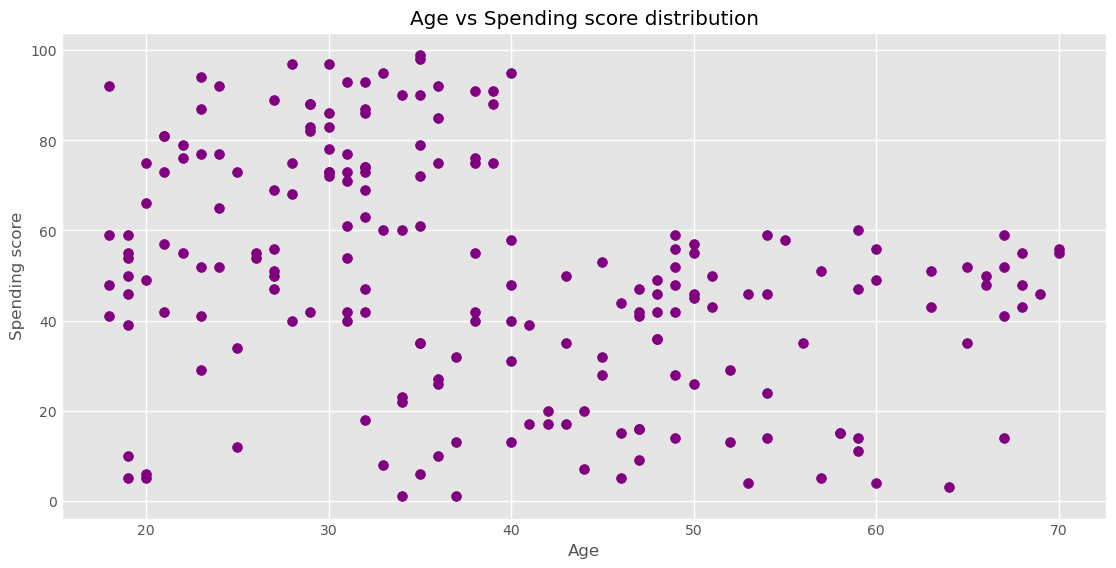

In [24]:
plt.subplots(figsize = (12, 6))

plt.scatter(x='Age', y = 'Spending Score (1-100)', data = df_cust, color='purple', s= 50)
plt.title("Age vs Spending score distribution")
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.show()

### Deciding the `K-value`

### Get 2-D array

In [26]:
elbow = df_cust[['Age', 'Spending Score (1-100)']].iloc[:,:].values
elbow

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [38]:
inertia = [] #create an empty list

In [39]:
for n in range(1, 11):
    algo = KMeans(n_clusters=n, init='k-means++', max_iter=300, tol=0.0001, random_state=45, algorithm='elkan')
    algo.fit(elbow)
    inertia.append(algo.inertia_)

C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini

In [40]:
inertia

[171535.49999999997,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23830.960393772893,
 19489.64388446867,
 15514.193134351028,
 13055.626865965574,
 11459.506094710445,
 10173.03947811448]

### Plot the elbow data

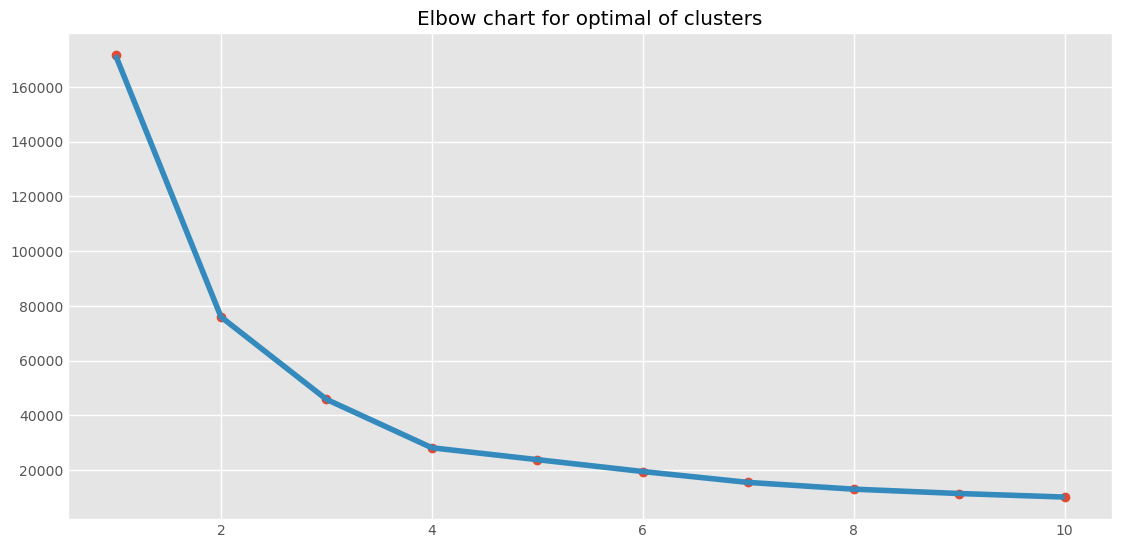

In [53]:
plt.subplots(figsize=(12, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-')
plt.title('Elbow chart for optimal of clusters')
#plt.xlabel('Number of cluster')
#plt.ylabel('Cost')
plt.show()

### Let us start with `K=3`

In [57]:
algo_3 =  algo = KMeans(n_clusters=3, init='k-means++', n_init=3, max_iter=300, tol=0.0001, random_state=45, algorithm='elkan')
algo_3.fit(elbow)

KMeans(algorithm='elkan', n_clusters=3, n_init=3, random_state=45)

In [64]:
labels_1 = algo_3.labels_
labels_1

array([2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [65]:
centroids_1 = algo_3.cluster_centers_

In [66]:
centroids_1

array([[29.56451613, 80.74193548],
       [42.95744681, 14.59574468],
       [43.05494505, 47.78021978]])

### plot the clusters

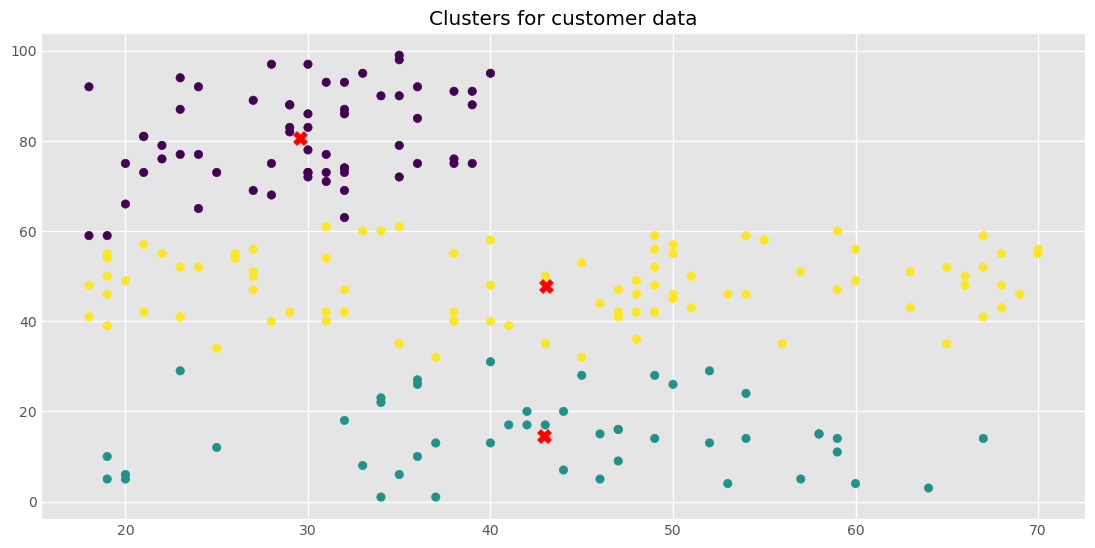

In [73]:
plt.subplots(figsize=(12, 6))
plt.scatter(elbow[:, 0], elbow[:, 1], c=labels_1, cmap='viridis')
plt.scatter(centroids_1[:,0], centroids_1[:,1], marker='X', color='red', s= 100)
plt.title("Clusters for customer data")
#plt.xlabel('Age')
#plt.ylabel('Spending score')
plt.show()

In [74]:
algo_4 =  algo = KMeans(n_clusters=4, init='k-means++', n_init=4, max_iter=300, tol=0.0001, random_state=45, algorithm='elkan')
algo_4.fit(elbow)

KMeans(algorithm='elkan', n_clusters=4, n_init=4, random_state=45)

In [75]:
labels_4 = algo_4.labels_
labels_4

array([1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 1, 3, 0, 1, 0,
       3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 2, 1,
       3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [77]:
centroids_4 = algo_4.cluster_centers_
centroids_4

array([[30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [55.70833333, 48.22916667],
       [43.29166667, 15.02083333]])

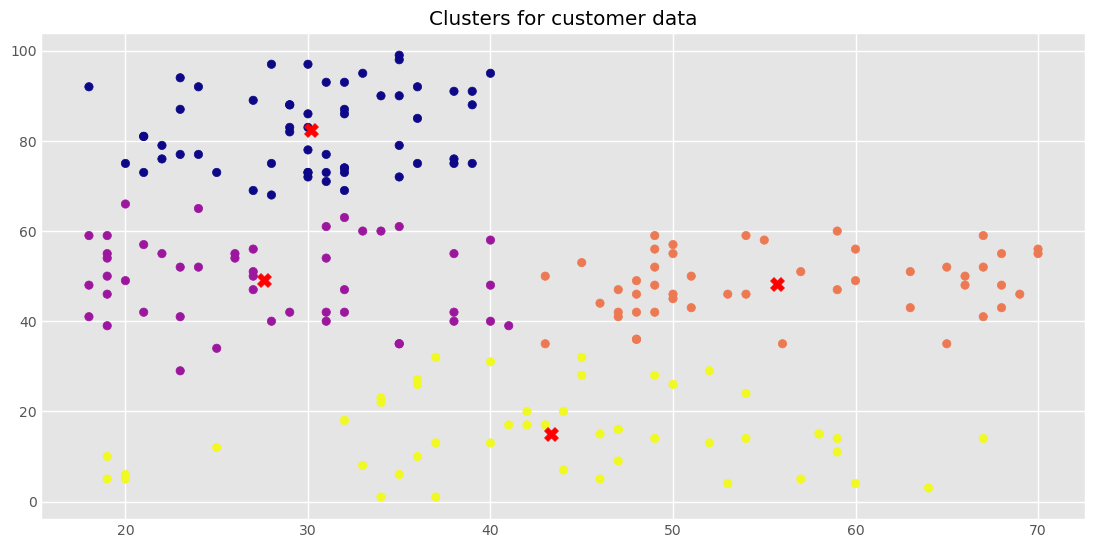

In [83]:
plt.subplots(figsize=(12, 6))
plt.scatter(elbow[:, 0], elbow[:, 1], c=labels_4, cmap='plasma')#cmap='inferno')
plt.scatter(centroids_4[:,0], centroids_4[:,1], marker='X', color='red', s= 100)
plt.title("Clusters for customer data")
#plt.xlabel('Age')
#plt.ylabel('Spending score')
plt.show()